In [73]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [139]:
#for testing purposes
fldr_path = '/Users/shartnett/Desktop/LargeScaleComputing_S21/Final/final-project-viralsentiments-main/test_csvs/'
old_DF = pd.read_csv('old.csv')
subdf1 = pd.read_csv('test_csvs/csv1.csv')
subdf2 = pd.read_csv('test_csvs/csv2.csv')
subdf3 = pd.read_csv('test_csvs/csv3.csv')

In [113]:
def df_from_folder(folder_path):
    '''
    want to create a function that takes a folder location, reads in all the files and appends them
    to a single DF
    '''
    folder_DF = pd.DataFrame()
    
    files = [f for f in os.listdir(folder_path)] # if os.path.isfile(f)]

    for f in files:
        if f[-4:] == '.csv':
            print("working on:", f)
            with open (folder_path + f, "r") as myfile:
                temp_DF = pd.read_csv(myfile, index_col=0)

                folder_DF = folder_DF.append(temp_DF, ignore_index=True)
        
    return folder_DF

In [127]:
def create_sentiment_barplot(sums_DF, columns, markers, output_imagename):
            
    lst_dfs = [sums_DF[[marker]] for marker in markers]
    sums_select_cols = sums[markers]
    plot_sent_scores = sums_select_cols.plot(kind='bar', subplots=True, figsize=(20,20), title = 'Sentiment for Tweets with Various Subjects')
    plot_sent_scores[0].get_figure().savefig(output_imagename)



In [128]:
def analysis_pipeline(DF, sent_barpl_filename):
    
    for i in range(len(DF['sentiment_code'])):
        if DF.at[i, 'sentiment_code'] == 'MIXED':
            DF.at[i, 'sentiment_code'] = 'NEUTRAL'
    
    sums = DF.groupby('sentiment_code').sum()
    columns = list(DF.columns)
    markers = columns[13:]
    
    create_sentiment_barplot(sums, columns, markers, sent_barpl_filename)
    corr_table = create_correlation_table(DF, markers)
    
    return corr_table

In [135]:
def create_correlation_table(DF, markers):
    
    corr_dict = {}

    for marker in markers:
       corr_dict[marker] = {}
       print('perc tweets containing marker:', marker, '=', 100*(DF[marker].mean()))
       for score in ['positive_score', 'negative_score','neutral_score']:
          corr_dict[marker][score] = DF[marker].corr(DF[score])

    df_sent_marker_corrs = (pd.DataFrame.from_dict(corr_dict, orient = 'index'))
    #plot_sent_corrs = df_sent_marker_corrs.plot(kind='scatter', subplots=True, figsize=(20,20), title = 'Sentiment Score Correlation for Various Subjects')
    #plot_sent_scores[0].get_figure().savefig(output_imagename)
   
    return df_sent_marker_corrs



working on: csv1.csv
working on: csv2.csv
working on: csv3.csv
perc tweets containing marker: mask_marker = 8.47231487658439
perc tweets containing marker: cdc_marker = 1.0673782521681119
perc tweets containing marker: vaccine_marker = 21.947965310206804
perc tweets containing marker: lockdown_marker = 18.345563709139427
perc tweets containing marker: quarantine_marker = 4.66977985323549
perc tweets containing marker: pfizer_marker = 1.134089392928619
perc tweets containing marker: moderna_marker = 0.8005336891260841
perc tweets containing marker: covid_marker = 51.100733822548364
perc tweets containing marker: stayathome_marker = 0.5336891260840559
perc tweets containing marker: jj_marker = 0.0


positive_score  negative_score  neutral_score
mask_marker              0.097881       -0.042923      -0.029733
cdc_marker              -0.032166       -0.012089       0.029393
vaccine_marker          -0.023029       -0.055236       0.068257
lockdown_marker          0.066262        0.089520      -0.125614
quarantine_marker       -0.019037        0.006053      -0.014342
pfizer_marker           -0.008255       -0.015273       0.028053
moderna_marker          -0.003920       -0.026723       0.034311
covid_marker            -0.063996        0.008340       0.028058
stayathome_marker       -0.004311       -0.065924       0.058225
jj_marker                     NaN             NaN            NaN

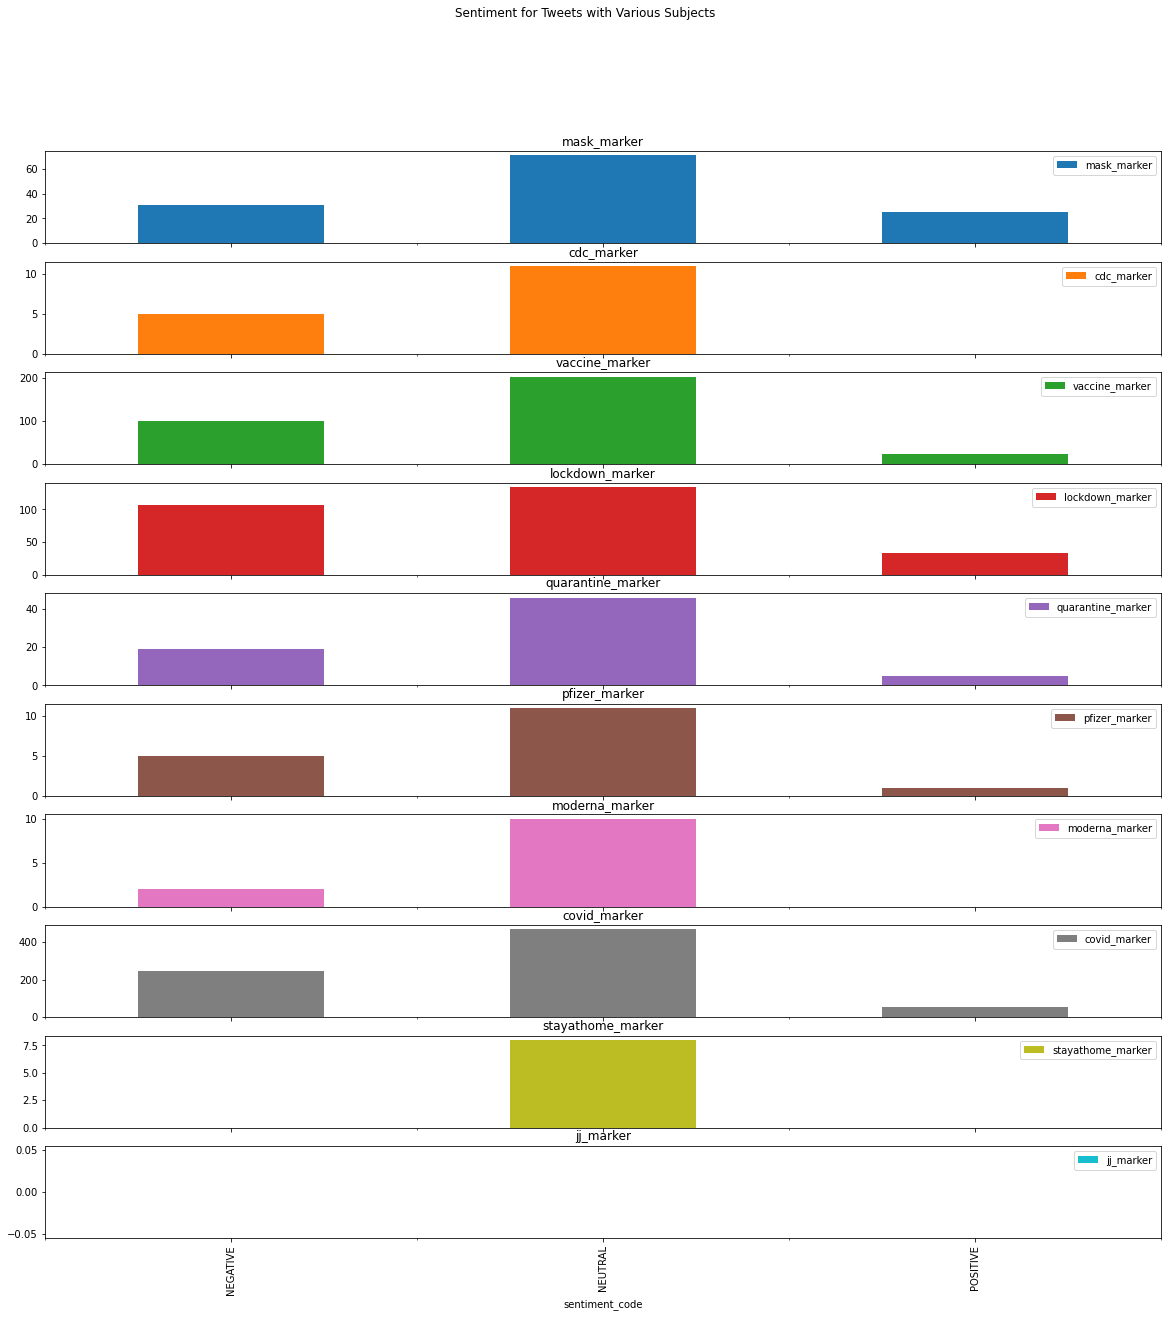

In [140]:
full_DF = df_from_folder(fldr_path)
analysis_pipeline(full_DF, 'testing_funct.png')

In [ ]:
''' 
columns = Index(['Unnamed: 0', 'tweet_ID', 'user_location', 'tweet_created_at', 'text',
       'hashtags', 'sentiment_code', 'positive_score', 'negative_score',
       'neutral_score', 'mixed_score', 'searchwords', 'tweet_id',
       'mask_marker', 'cdc_marker', 'vaccine_marker', 'lockdown_marker',
       'quarantine_marker', 'pfizer_marker', 'moderna_marker', 'covid_marker',
       'stayathome_marker', 'jj_marker'],
      dtype='object')
'''

In [106]:
for i in range(len(full_DF['sentiment_code'])):
    if full_DF.at[i, 'sentiment_code'] == 'MIXED':
        full_DF.at[i, 'sentiment_code'] = 'NEUTRAL'

In [107]:
sums = full_DF.groupby('sentiment_code').sum()

In [97]:
columns = list(full_DF.columns)
markers = columns[13:]
#markers = ['mask_marker', 'cdc_marker', 'vaccine_marker', 'lockdown_marker','quarantine_marker', 'pfizer_marker', 'moderna_marker', 'covid_marker','stayathome_marker', 'jj_marker']
lst_dfs = [sums[[marker]] for marker in markers]

#lst_dfs

In [99]:
#sums_select_cols = sums[['mask_marker', 'cdc_marker', 'vaccine_marker', 'lockdown_marker','quarantine_marker', 'pfizer_marker', 'moderna_marker', 'covid_marker','stayathome_marker', 'jj_marker']]
sums_select_cols = sums[markers]

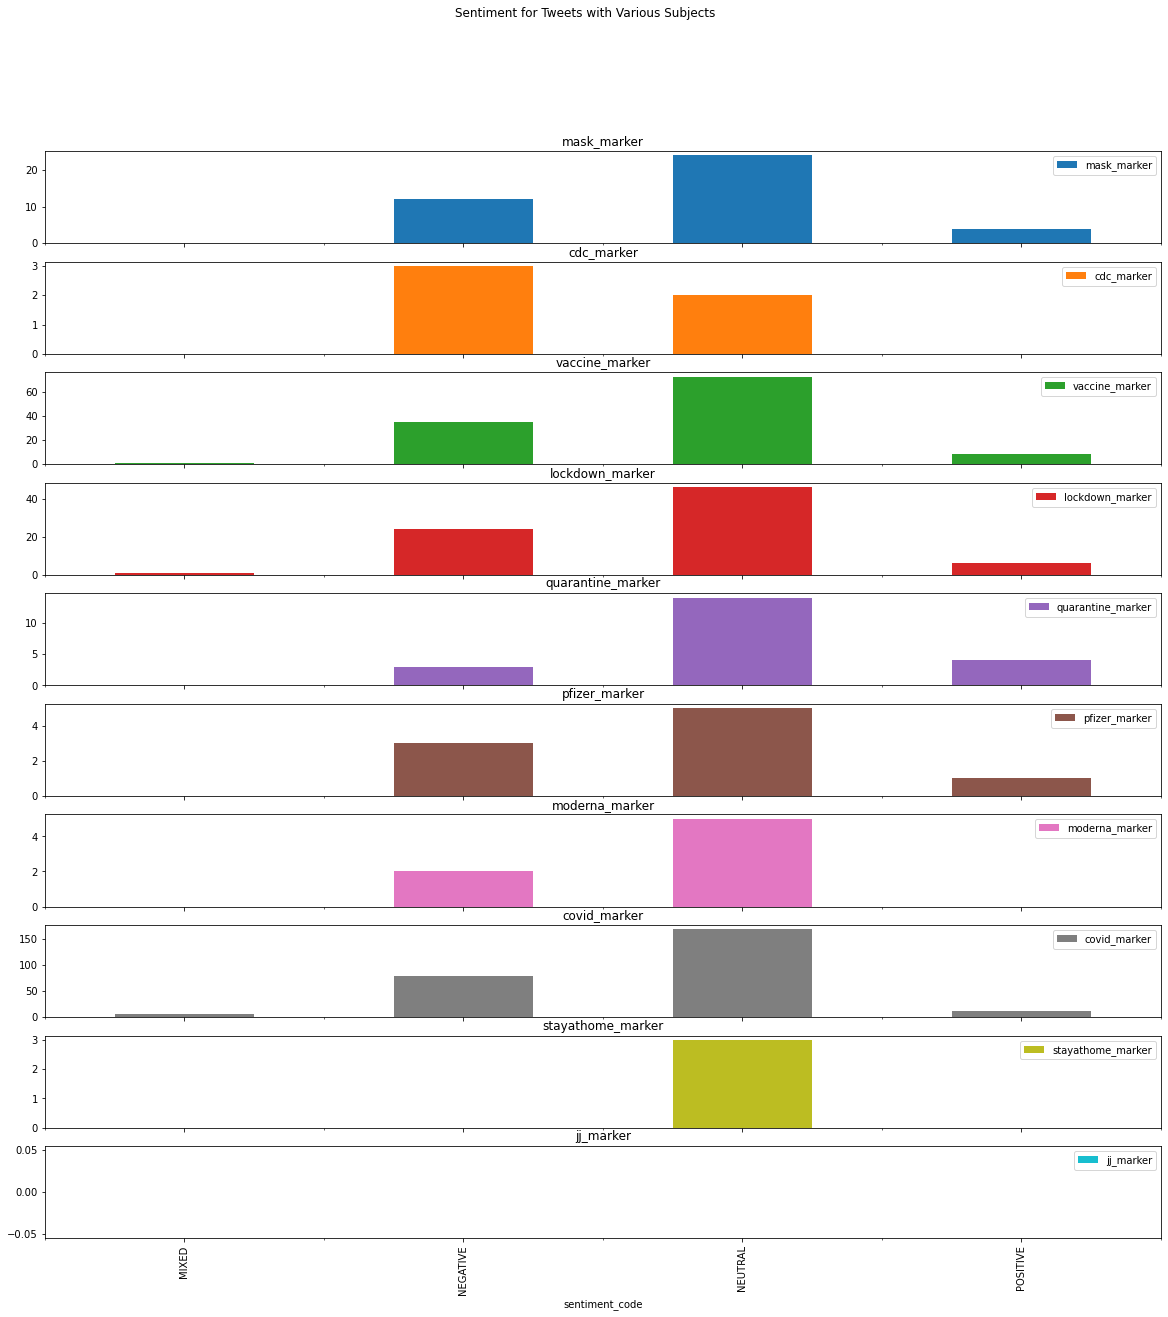

In [109]:
plot_sent_scores = sums_select_cols.plot(kind='bar', subplots=True, figsize=(20,20), title = 'Sentiment for Tweets with Various Subjects')


In [110]:
plot_sent_scores[0].get_figure().savefig('testbars2.pdf')